# 第3章 スカラー移流方程式における時間積分法

# 3.3(6) 近似LDU分解

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def init(q1, q2, xs, dx, jmax):
    x = np.linspace(xs, xs + dx * (jmax-1), jmax)
    q = np.array([(float(q1) if i < 0.0 else float(q2)) for i in x])
    return (x, q)

In [3]:
def UPWIND1(alf, q, c, dt, dx, jmax):
    for j in range(0, jmax - 1):
        ur, ul = q[j+1], q[j]
        fr, fl = c * ur, c * ul
        alf[j] = 0.5 * (fr + fl - abs(c) * (ur - ul)) # 式(2.34)

In [4]:
def do_computing_LDU(x, q, c, dt, dx, nmax, ff, interval = 2, xlim = None):
    plt.figure(figsize=(7,7), dpi=100) # グラフのサイズ
    plt.rcParams["font.size"] = 22 # グラフの文字サイズ

    # 初期分布
    plt.plot(x, q, marker='o', lw=2, label='t = 0')

    alf = np.zeros(jmax)
    dq = np.zeros(jmax)
    for n in range(1, nmax + 1):
        qold = q.copy()
        
        # 近似LDU分解
        c_a = abs(c)
        c_p = 0.5 * (c + c_a)
        c_n = 0.5 * (c - c_a)
        nu_a = c_a * dt / dx
        nu_p = c_p * dt / dx
        nu_n = c_n * dt / dx
        
        ff(alf, qold, c, dt, dx, jmax)
        R = np.append(0.0, np.diff(alf) / dx)

        ## 第一スイープ
        for j in range(1, jmax - 1):
            dq[j] = (-dt * R[j] + nu_p * dq[j - 1]) / (1 + nu_a)
                
        ## 第二、第三スイープ
        for j in range(jmax - 2, 0, -1):
            dq[j] = dq[j] - nu_n * dq[j + 1] / (1 + nu_a)
        
        for j in range(1, jmax - 1):
            q[j] = qold[j] + dq[j]
        
        # 各ステップの可視化
        if n % interval == 0:
            plt.plot(x, q, marker='o', lw=2, label=f't = {dt * n : .1f}')            
            
    # グラフの後処理
    plt.grid(color='black', linestyle='dashed', linewidth=0.5)
    plt.xlabel('x')
    plt.ylabel('q')
    if xlim is not None:
        plt.xlim(xlim)
    plt.legend()
    plt.show()

## 図3-1 (a)

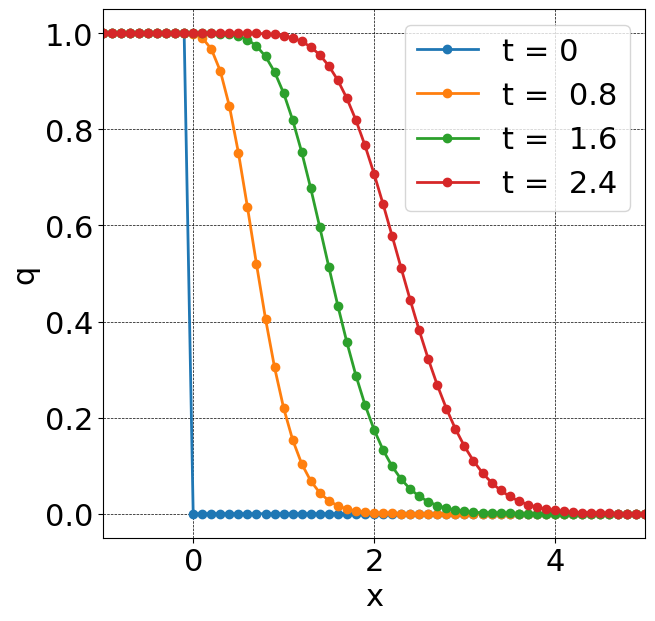

In [5]:
c = 1
dt = 0.05
dx = 0.1

jmax = 70
nmax = 50

xs = -1

q1 = 1
q2 = 0
x, q = init(q1, q2, xs, dx, jmax)
do_computing_LDU(x, q, c, dt, dx, nmax, UPWIND1, interval = 16, xlim = [-1, 5])

# 3-1 (b)

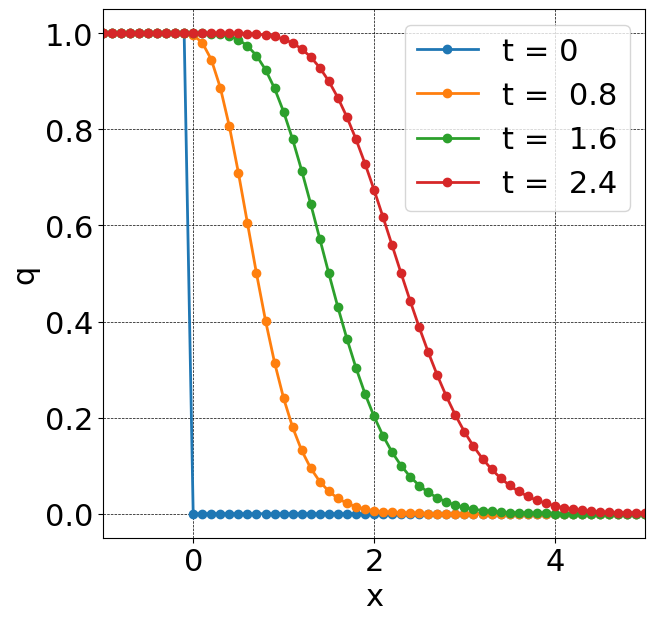

In [6]:
c = 1
dt = 0.1
dx = 0.1

jmax = 70
nmax = 24

xs = -1

q1 = 1
q2 = 0
x, q = init(q1, q2, xs, dx, jmax)
do_computing_LDU(x, q, c, dt, dx, nmax, UPWIND1, interval = 8, xlim = [-1, 5])

# 3-1 (c)

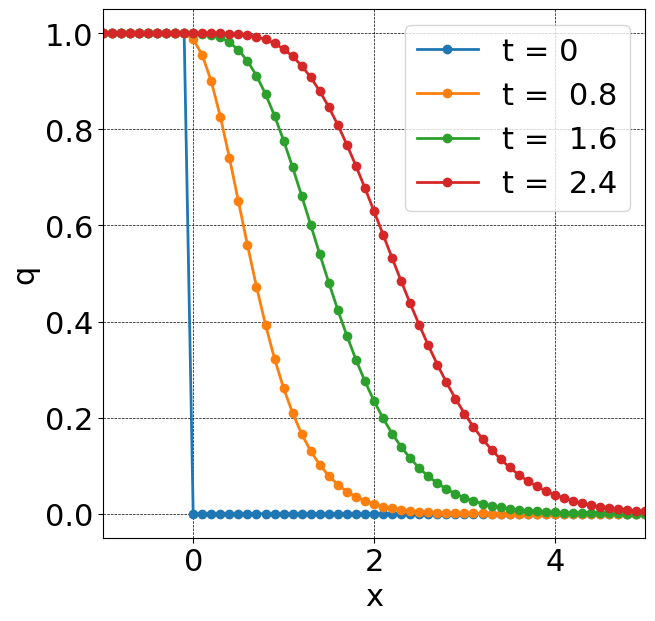

In [7]:
c = 1
dt = 0.2
dx = 0.1

jmax = 70
nmax = 12

xs = -1


q1 = 1
q2 = 0
x, q = init(q1, q2, xs, dx, jmax)
do_computing_LDU(x, q, c, dt, dx, nmax, UPWIND1, interval = 4, xlim = [-1, 5])

# 3-1 (d)

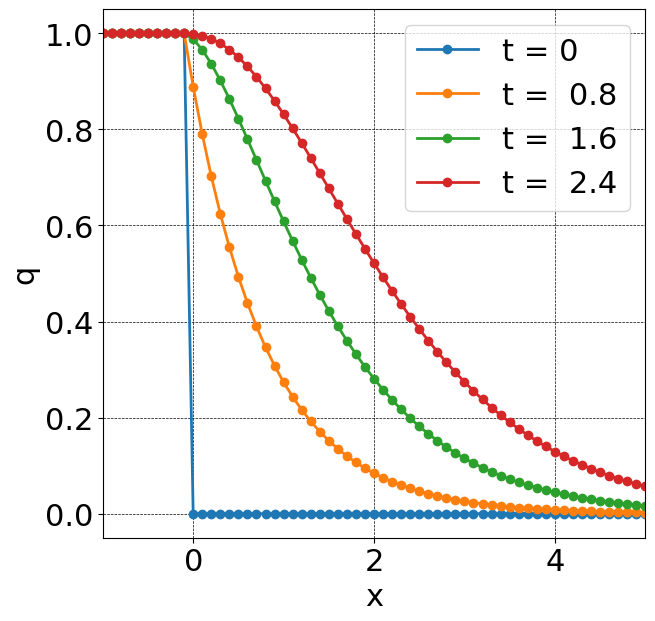

In [8]:
c = 1
dt = 0.8
dx = 0.1

jmax = 70
nmax = 3

xs = -1


q1 = 1
q2 = 0
x, q = init(q1, q2, xs, dx, jmax)
do_computing_LDU(x, q, c, dt, dx, nmax, UPWIND1, interval = 1, xlim = [-1, 5])

c > 0の場合

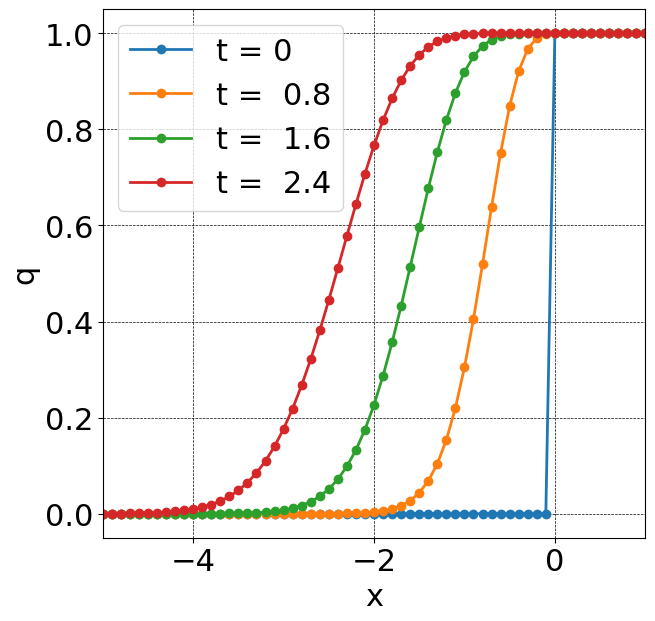

In [9]:
c = -1
dt = 0.05
dx = 0.1

jmax = 70
nmax = 50

xs = -5

q1 = 0
q2 = 1
x, q = init(q1, q2, xs, dx, jmax)
do_computing_LDU(x, q, c, dt, dx, nmax, UPWIND1, interval = 16, xlim = [-5, 1])